##### Faça Você Mesmo
1. Criar um modelo de ML (pode usar RNA/DL etc)
2. Busque a melhor performance

In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importando e visualizando os dados
df = pd.read_csv('./Data/soybean.csv')
df.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [3]:
# Visualizando as informação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             683 non-null    object
 1   plant-stand      683 non-null    object
 2   precip           683 non-null    object
 3   temp             683 non-null    object
 4   hail             683 non-null    object
 5   crop-hist        683 non-null    object
 6   area-damaged     683 non-null    object
 7   severity         683 non-null    object
 8   seed-tmt         683 non-null    object
 9   germination      683 non-null    object
 10  plant-growth     683 non-null    object
 11  leaves           683 non-null    object
 12  leafspots-halo   683 non-null    object
 13  leafspots-marg   683 non-null    object
 14  leafspot-size    683 non-null    object
 15  leaf-shread      683 non-null    object
 16  leaf-malf        683 non-null    object
 17  leaf-mild        683 non-null    ob

In [4]:
# visualizando a quantidade de class
df_class = df['class']
df_class

0      diaporthe-stem-canker
1      diaporthe-stem-canker
2      diaporthe-stem-canker
3      diaporthe-stem-canker
4      diaporthe-stem-canker
               ...          
678             2-4-d-injury
679         herbicide-injury
680         herbicide-injury
681         herbicide-injury
682         herbicide-injury
Name: class, Length: 683, dtype: object

In [5]:
# Agrupando as class
agrupado = df.groupby(['class']).size()
agrupado

class
2-4-d-injury                   16
alternarialeaf-spot            91
anthracnose                    44
bacterial-blight               20
bacterial-pustule              20
brown-spot                     92
brown-stem-rot                 44
charcoal-rot                   20
cyst-nematode                  14
diaporthe-pod-&-stem-blight    15
diaporthe-stem-canker          20
downy-mildew                   20
frog-eye-leaf-spot             91
herbicide-injury                8
phyllosticta-leaf-spot         20
phytophthora-rot               88
powdery-mildew                 20
purple-seed-stain              20
rhizoctonia-root-rot           20
dtype: int64

<AxesSubplot:ylabel='class'>

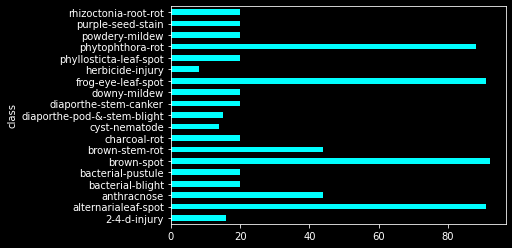

In [6]:
# Visualizando em forma de gráfico
agrupado.plot.barh(color='cyan')

##### Implementado Machine Learning
com Algoritmo Naïve Bayes


In [7]:
# Criando os previsores e a class
previsores = df.iloc[:,0:35].values
classe = df.iloc[:,35].values
classe

array(['diaporthe-stem-canker', 'diaporthe-stem-canker',
       'diaporthe-stem-canker', 'diaporthe-stem-canker',
       'diaporthe-stem-canker', 'diaporthe-stem-canker',
       'diaporthe-stem-canker', 'diaporthe-stem-canker',
       'diaporthe-stem-canker', 'diaporthe-stem-canker', 'charcoal-rot',
       'charcoal-rot', 'charcoal-rot', 'charcoal-rot', 'charcoal-rot',
       'charcoal-rot', 'charcoal-rot', 'charcoal-rot', 'charcoal-rot',
       'charcoal-rot', 'rhizoctonia-root-rot', 'rhizoctonia-root-rot',
       'rhizoctonia-root-rot', 'rhizoctonia-root-rot',
       'rhizoctonia-root-rot', 'rhizoctonia-root-rot',
       'rhizoctonia-root-rot', 'rhizoctonia-root-rot',
       'rhizoctonia-root-rot', 'rhizoctonia-root-rot', 'phytophthora-rot',
       'phytophthora-rot', 'phytophthora-rot', 'phytophthora-rot',
       'phytophthora-rot', 'phytophthora-rot', 'phytophthora-rot',
       'phytophthora-rot', 'phytophthora-rot', 'phytophthora-rot',
       'phytophthora-rot', 'phytophthora-rot'

In [8]:
# importando as função de  Naïve Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 

In [9]:
for i in range(0, 35):
    labelencoder0 = LabelEncoder()
    previsores[:,i] = labelencoder0.fit_transform(previsores[:,i])

In [10]:
# Divisão da base de dados entre treinamento e teste
# (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    previsores, classe, test_size = 0.3, random_state = 0
)
X_teste

array([[4, 2, 1, ..., 2, 1, 2],
       [2, 1, 3, ..., 0, 0, 3],
       [5, 1, 0, ..., 0, 0, 3],
       ...,
       [7, 2, 1, ..., 2, 1, 2],
       [4, 1, 1, ..., 2, 1, 3],
       [5, 1, 3, ..., 1, 2, 0]], dtype=object)

In [11]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [12]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array(['alternarialeaf-spot', 'phytophthora-rot', 'herbicide-injury',
       'purple-seed-stain', 'cyst-nematode', 'bacterial-blight',
       'brown-stem-rot', 'bacterial-pustule', 'brown-spot',
       'alternarialeaf-spot', 'charcoal-rot', 'bacterial-blight',
       'anthracnose', 'anthracnose', 'alternarialeaf-spot', 'brown-spot',
       'alternarialeaf-spot', 'alternarialeaf-spot',
       'rhizoctonia-root-rot', 'phytophthora-rot', 'anthracnose',
       'brown-stem-rot', 'phyllosticta-leaf-spot',
       'phyllosticta-leaf-spot', 'diaporthe-stem-canker', 'brown-spot',
       'anthracnose', 'diaporthe-stem-canker', 'bacterial-pustule',
       'phytophthora-rot', 'frog-eye-leaf-spot', 'alternarialeaf-spot',
       'phyllosticta-leaf-spot', 'frog-eye-leaf-spot',
       'frog-eye-leaf-spot', 'bacterial-pustule', 'brown-stem-rot',
       'charcoal-rot', 'brown-spot', 'alternarialeaf-spot',
       'brown-stem-rot', 'alternarialeaf-spot', 'phytophthora-rot',
       'anthracnose', 'bacterial

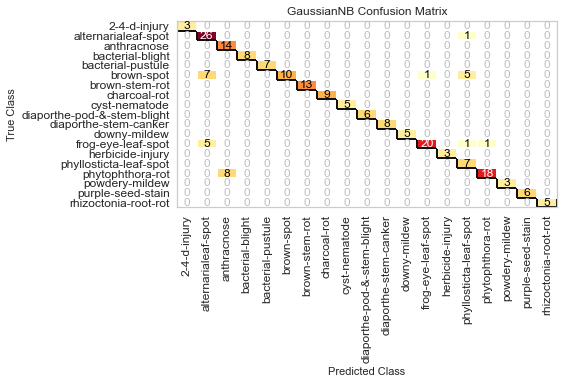

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [13]:
# Visualização da matriz de confusão
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [14]:
# visualizando a taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.8585365853658536

Testando com Árvores de decisão

In [15]:
# Importação das bibliotecas
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [16]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [17]:
# Exportação da árvore de decisão para o formato .dot
# para posterior visualização
export_graphviz(arvore, out_file = 'tree.dot')

In [18]:
# Obtenção das previsões
previsoes = arvore.predict(X_teste)
previsoes

array(['brown-spot', 'phytophthora-rot', 'herbicide-injury',
       'purple-seed-stain', 'cyst-nematode', 'bacterial-blight',
       'brown-stem-rot', 'bacterial-pustule', 'brown-spot',
       'alternarialeaf-spot', 'charcoal-rot', 'bacterial-blight',
       'anthracnose', 'anthracnose', 'alternarialeaf-spot', 'brown-spot',
       'alternarialeaf-spot', 'alternarialeaf-spot',
       'rhizoctonia-root-rot', 'phytophthora-rot', 'anthracnose',
       'brown-stem-rot', 'brown-spot', 'phyllosticta-leaf-spot',
       'diaporthe-stem-canker', 'brown-spot', 'anthracnose',
       'diaporthe-stem-canker', 'bacterial-blight', 'phytophthora-rot',
       'frog-eye-leaf-spot', 'alternarialeaf-spot',
       'phyllosticta-leaf-spot', 'brown-spot', 'brown-spot',
       'bacterial-pustule', 'brown-stem-rot', 'charcoal-rot',
       'brown-spot', 'brown-spot', 'brown-stem-rot',
       'alternarialeaf-spot', 'phytophthora-rot', 'anthracnose',
       'bacterial-pustule', '2-4-d-injury', 'alternarialeaf-spot

In [19]:
#taxa acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.9024390243902439

In [20]:
#taxa erro
taxa_erro = 1 - taxa_acerto
taxa_erro

0.09756097560975607

#### Resultado final
Foi testando dois algorítimo de Machine Learning
* Algoritmo Naïve Bayes
* Árvores de decisão
sendo que a taxa de acerto de :
1. Naïve Bayes = 0.85
2. Ávores de decisão = 0.90
Vemos que o melhor foi Ávores de decisão